In [1]:
import math
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

In [2]:
frs = pd.read_csv('5. FRS Questionnaire Analysis/Resulting Dataframes/FRS_data.csv')
frs.columns

Index(['Unnamed: 0', 'Participant_ID', 'Condition', 'FRS_2_bool', 'Gender',
       'Age', 'Field_of_study', 'FRS', 'Question', 'Answer', 'Scale'],
      dtype='object')

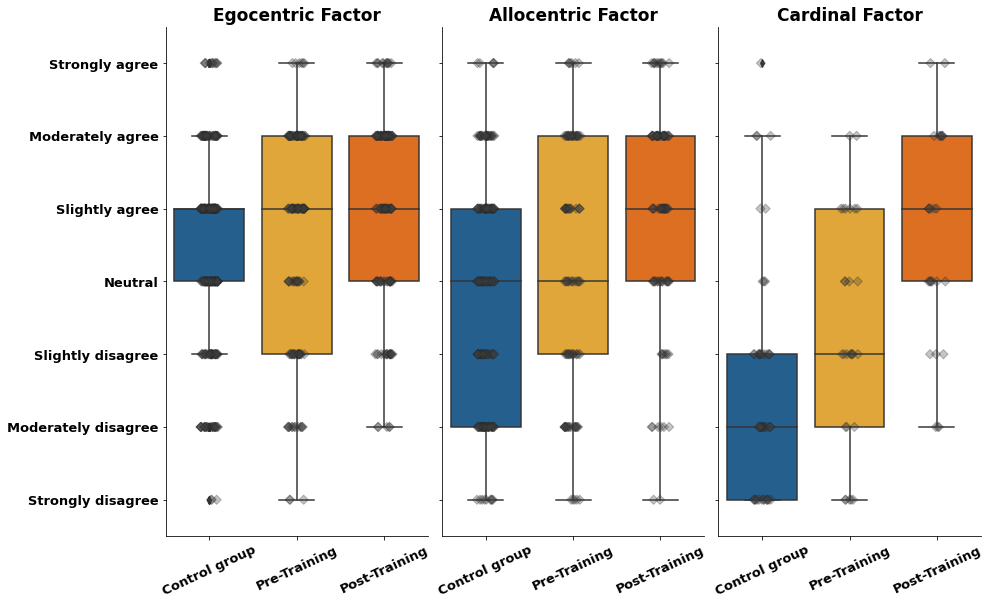

In [3]:
#fig, ax = plt.subplots(1, sharex=False, sharey=False, gridspec_kw={'hspace': 0}, figsize=(10, 5))
g=sns.catplot(x="FRS", y="Answer", col="Scale", order=['Control group', 'Pre-Training', 'Post-Training'],
            palette=["#1261a0", "#fcae1e", "#fc6a03"], aspect=0.5, dodge=False, kind="box", data=frs,
              height=8)
g.map_dataframe(sns.stripplot, x="FRS", y="Answer", 
                order=['Control group', 'Pre-Training', 'Post-Training'], linewidth=1, 
                alpha=0.3, dodge=True, size=6.5, marker="D", color="#404040", edgecolor="gray", facecolors='white')
g.set_titles("{col_name} Factor", weight='bold', size=17)
g.set_xticklabels(rotation=25, size=13, weight="bold")
g.set_axis_labels('', '')
g.set(ylim=(0.5, 7.5))
g.set(yticks=[1, 2, 3, 4, 5, 6, 7])
g.set_yticklabels(["Strongly disagree", "Moderately disagree", "Slightly disagree", "Neutral",
                   "Slightly agree", "Moderately agree", "Strongly agree"], size=13, weight="bold")

#plt.savefig('Plots/FRS_plot.png', bbox_inches="tight", dpi=800)

In [4]:
# PTN
PTNcontrol = pd.read_csv("3. Angle Calculation/Resulting Dataframes/df_PTN_Ctrl_Preprocessed.csv")
PTNbelt = pd.read_csv("3. Angle Calculation/Resulting Dataframes/df_PTN_Exp_Preprocessed.csv")

PTNbelt = PTNbelt[np.isnan(PTNbelt.SignedAngle) == False]
PTNcontrol = PTNcontrol[PTNcontrol.TimeOut == False]
PTNbelt = PTNbelt[PTNbelt.TimeOut == False]

#PTB
PTBcontrol = pd.read_csv("3. Angle Calculation/Resulting Dataframes/df_PTB_Ctrl_Preprocessed.csv")
PTBbelt = pd.read_csv("3. Angle Calculation/Resulting Dataframes/df_PTB_Exp_Preprocessed.csv")

PTBbelt = PTBbelt[np.isnan(PTBbelt.SignedAngle) == False]
PTBcontrol = PTBcontrol[PTBcontrol.TimeOut == False]
PTBbelt = PTBbelt[PTBbelt.TimeOut == False]

In [5]:
# Combine all four dataframes
ptn=pd.concat([PTNcontrol, PTNbelt])
ptb=pd.concat([PTBcontrol, PTBbelt])
full_dataset=pd.concat([PTNcontrol, PTNbelt, PTBbelt, PTBcontrol])

In [6]:
PTNcontroldescribe = PTNcontrol.groupby("SubjectID")['RecalculatedAngle'].describe()
PTNbeltdescribe = PTNbelt.groupby("SubjectID")['RecalculatedAngle'].describe()

PTBcdescribe = PTBcontrol.groupby("SubjectID")['RecalculatedAngle'].describe()
PTBtdescribe = PTBbelt.groupby("SubjectID")['RecalculatedAngle'].describe()

In [7]:
sns.set_style(style="ticks")

# Order participants from best avg performance (left) to worst avg performance (right) for the heatmap

def orderParticipants(inputdf=pd.DataFrame(), XorderBy=""):
    inputdf = inputdf.sort_values(XorderBy)
    for i, x in enumerate(inputdf.SubjectID.unique()):
        inputdf['SubjectID'] = inputdf['SubjectID'].replace(
            x, i + 1)
    return inputdf.reset_index()

PTN:


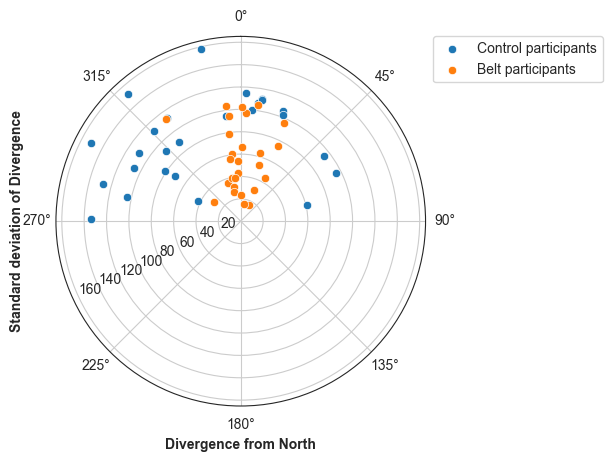

PTB:


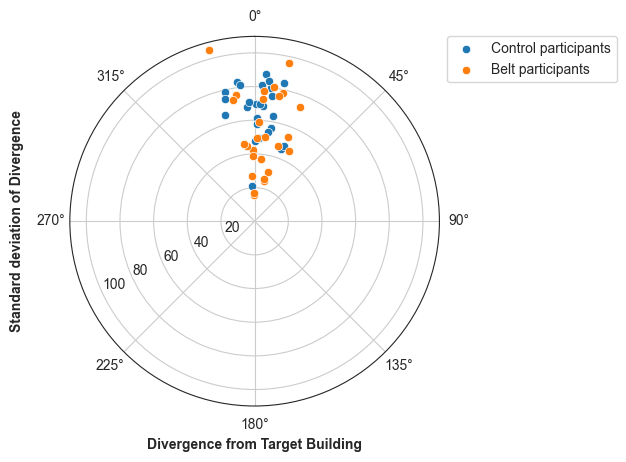

In [16]:
# deviation from building per participant
ax = plt.axes(projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction("clockwise")
# ax.set_thetamin(90)  # set the limits
# ax.set_thetamax(-90)
ax.set_xlabel("Divergence from North", weight = 'bold')
ax.set_ylabel("Standard deviation of Divergence", labelpad=23, weight = 'bold')
ax.set_rlabel_position(245)
#ax.set_xticks(np.pi/180. * np.linspace(180,  -180, 8))
#plt.title("Directional bias")
avg = []
subj = []
for subject in PTNcontrol.SubjectID.unique():
    avg = avg + [math.radians(np.average(
            PTNcontrol[PTNcontrol.SubjectID == subject]['SignedAngle']))]
    subj = subj + [np.std(PTNcontrol[PTNcontrol.SubjectID == subject]['SignedAngle'])]

# plotting the datapoints
sns.scatterplot(x=avg, y=subj, palette='#1261a0', label="Control participants")

avg = []
subj = []
for subject in PTNbelt.SubjectID.unique():
    avg = avg + [math.radians(np.average(
        PTNbelt[PTNbelt.SubjectID == subject]['SignedAngle']))]
    subj = subj + [np.std(PTNbelt[PTNbelt.SubjectID == subject]['SignedAngle'])]

# plotting the datapoints
sns.scatterplot(x=avg, y=subj, palette='#fc6a03', label="Belt participants")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
print("PTN:")
#plt.savefig('Plots/PTN_Bias.png', bbox_inches="tight", dpi=800)
plt.show()

# deviation from building per participant
ax = plt.axes(projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction("clockwise")
# ax.set_thetamin(90)  # set the limits
# ax.set_thetamax(-90)
ax.set_xlabel("Divergence from Target Building", weight='bold')
ax.set_ylabel("Standard deviation of Divergence", labelpad=33, weight='bold')
ax.set_rlabel_position(245)
#ax.set_rlim(0,165)
#plt.title("Directional bias")
avg = []
subj = []
for subject in PTBcontrol.SubjectID.unique():
    avg = avg + [math.radians(np.average(
            PTBcontrol[PTBcontrol.SubjectID == subject]['SignedAngle']))]
    subj = subj + [np.std(PTBcontrol[PTBcontrol.SubjectID == subject]['SignedAngle'])]

# plotting the datapoints
sns.scatterplot(x=avg, y=subj, palette='#1261a0', label="Control participants")

avg = []
subj = []
for subject in PTBbelt.SubjectID.unique():
    avg = avg + [math.radians(np.average(
        PTBbelt[PTBbelt.SubjectID == subject]['SignedAngle']))]
    subj = subj + \
        [np.std(PTBbelt[PTBbelt.SubjectID == subject]['SignedAngle'])]

# plotting the datapoints
sns.scatterplot(x=avg, y=subj, palette='#fc6a03', label="Belt participants")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
print("PTB:")
#plt.savefig('Plots/PTB_Bias.png', bbox_inches="tight", dpi=800)
plt.show()

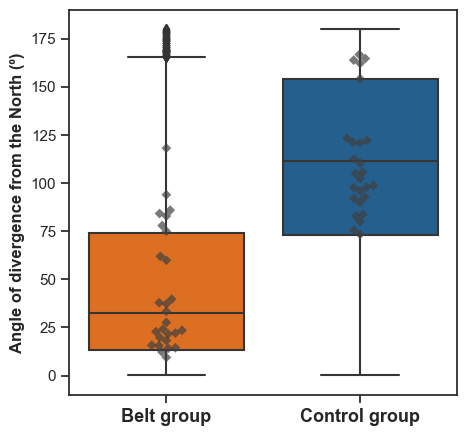

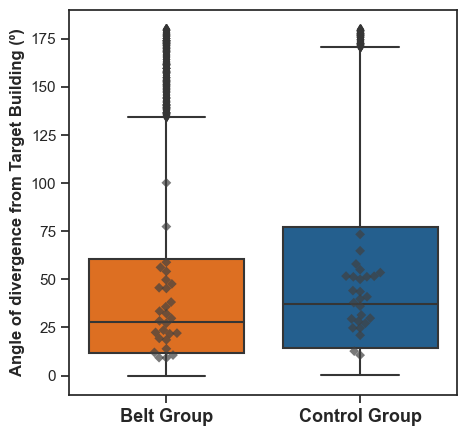

In [17]:
yvals, grp = [], []

for i, subject in enumerate(PTNbelt.SubjectID.unique()):
    yvals.append(np.median(
        PTNbelt[PTNbelt.SubjectID == subject]['RecalculatedAngle']))
    grp.append("Belt group")
    

for i, subject in enumerate(PTNcontrol.SubjectID.unique()):
    yvals.append(np.median(
        PTNcontrol[PTNcontrol.SubjectID == subject]['RecalculatedAngle']))
    grp.append("Control group")


# %%
#plt.title("Average Deviation from Target per Participants of the respective Groups")
sns.set(rc={"figure.figsize": (5, 5)}, style="ticks")
sns.boxplot(x=ptn.Condition, y=ptn.RecalculatedAngle, order=["Belt", "Control"], palette=['#fc6a03', '#1261a0'])
sns.swarmplot(x=grp, y=yvals, 
              color="#404040", edgecolor="gray", facecolors='white', marker="D", alpha=0.7)

#plt.axhline(np.median(yvals), color='black', linestyle='--')
plt.ylabel("Angle of divergence from the North (⁰)", weight = 'bold')
plt.xlabel("")
plt.xticks(size=13, weight='bold')
plt.ylim(-10,190)

#plt.savefig('Plots/PTN_Results.png', bbox_inches="tight", dpi=800)
plt.show()


yvals, grp = [], []


for i, subject in enumerate(PTBbelt.SubjectID.unique()):
    yvals.append(np.median(
        PTBbelt[PTBbelt.SubjectID == subject]['RecalculatedAngle']))
    grp.append("Belt Group")
    
    
for i, subject in enumerate(PTBcontrol.SubjectID.unique()):
    yvals.append(np.median(
        PTBcontrol[PTBcontrol.SubjectID == subject]['RecalculatedAngle']))
    grp.append("Control Group")


#plt.title("Average Divergence per Participants of the respective Groups")
sns.set(rc={"figure.figsize": (5, 5)}, style="ticks")
sns.boxplot(x=ptb.Condition, y=ptb.RecalculatedAngle, order=["Belt", "Control"], palette=['#fc6a03', '#1261a0'])
sns.swarmplot(x=grp, y=yvals, color="#404040", edgecolor="gray", facecolors='white',
              marker="D", alpha=0.7)
plt.ylabel("Angle of divergence from Target Building (⁰)", weight='bold')
plt.xlabel("")
plt.xticks(size=13, weight='bold')
plt.ylim(-10,190)

#plt.axhline(np.median(yvals), color='black', linestyle='--')

#plt.savefig('Plots/PTB_Results.png', bbox_inches="tight", dpi=800)
plt.show()

In [15]:
# GHP
GHP = pd.read_csv("Dataframes/GHP_CompleteDF.csv")
GHPcontrol = GHP[GHP["Condition"] == "Control"]
GHPbelt = GHP[GHP["Condition"] == "Belt"]

GHPbelt = GHPbelt[np.isnan(GHPbelt.SignedAngle) == False]
GHPcontrol = GHPcontrol[GHPcontrol.TimeOut == False]
GHPbelt = GHPbelt[GHPbelt.TimeOut == False]

In [16]:
# Combine all four dataframes

full_dataset=pd.concat([GHPbelt, GHPcontrol])

In [17]:
sns.set_style(style="ticks")

# Order participants from best avg performance (left) to worst avg performance (right) for the heatmap

def orderParticipants(inputdf=pd.DataFrame(), XorderBy=""):
    inputdf = inputdf.sort_values(XorderBy)
    for i, x in enumerate(inputdf.SubjectID.unique()):
        inputdf['SubjectID'] = inputdf['SubjectID'].replace(
            x, i + 1)
    return inputdf.reset_index()

NameError: name 'GHPcontrol' is not defined

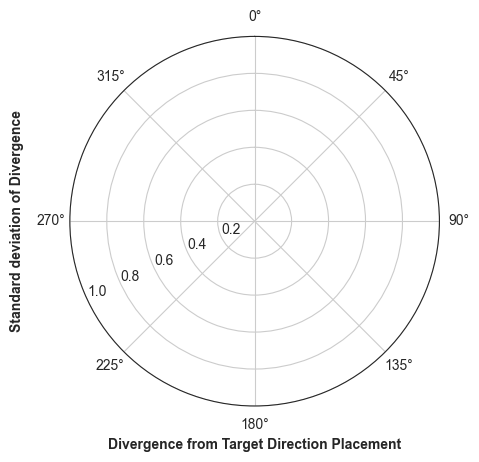

In [14]:
# deviation from target per participant
ax = plt.axes(projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction("clockwise")
# ax.set_thetamin(90)  # set the limits
# ax.set_thetamax(-90)
ax.set_xlabel("Divergence from Target Direction Placement", weight='bold')
ax.set_ylabel("Standard deviation of Divergence", labelpad=33, weight='bold')
ax.set_rlabel_position(245)
#plt.title("Directional bias")
avg = []
subj = []
for subject in GHPcontrol.SubjectID.unique():
    avg = avg + [math.radians(np.average(
            GHPcontrol[GHPcontrol.SubjectID == subject]['SignedAngle']))]
    subj = subj + [np.std(GHPcontrol[GHPcontrol.SubjectID == subject]['SignedAngle'])]

# plotting the datapoints
sns.scatterplot(x=avg, y=subj, palette="#1261a0", label="Control participants")

avg = []
subj = []
for subject in GHPbelt.SubjectID.unique():
    avg = avg + [math.radians(np.average(
        GHPbelt[GHPbelt.SubjectID == subject]['SignedAngle']))]
    subj = subj + \
        [np.std(GHPbelt[GHPbelt.SubjectID == subject]['SignedAngle'])]

# plotting the datapoints
sns.scatterplot(x=avg, y=subj, palette='#fc6a03', label="Belt participants")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
print("GHP:")
#plt.savefig('Plots/GHP_Dir_Bias.png', bbox_inches="tight", dpi=800)
plt.show()

GHP:


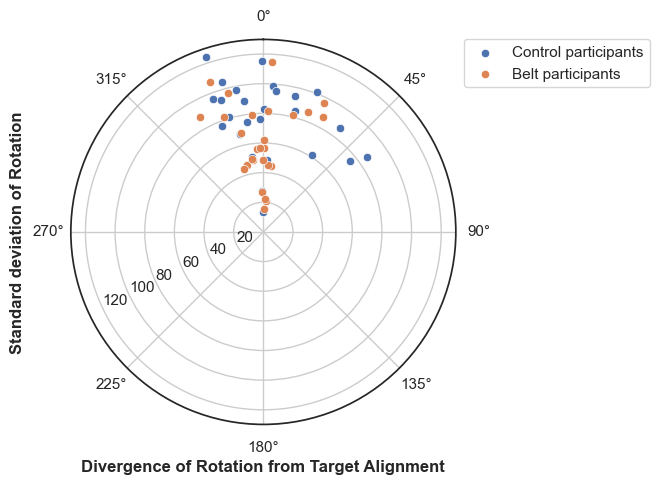

In [22]:
# deviation from target per participant
ax = plt.axes(projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction("clockwise")
# ax.set_thetamin(90)  # set the limits
# ax.set_thetamax(-90)
ax.set_xlabel("Divergence of Rotation from Target Alignment", weight='bold')
ax.set_ylabel("Standard deviation of Rotation", labelpad=33, weight='bold')
ax.set_rlabel_position(245)
#plt.title("Directional bias")
avg = []
subj = []
for subject in GHPcontrol.SubjectID.unique():
    avg = avg + [math.radians(np.average(
            GHPcontrol[GHPcontrol.SubjectID == subject]['GHP_RotDiff_signed']))]
    subj = subj + [np.std(GHPcontrol[GHPcontrol.SubjectID == subject]['GHP_RotDiff_signed'])]

# plotting the datapoints
sns.scatterplot(x=avg, y=subj, palette="#1261a0", label="Control participants")

avg = []
subj = []
for subject in GHPbelt.SubjectID.unique():
    avg = avg + [math.radians(np.average(
        GHPbelt[GHPbelt.SubjectID == subject]['GHP_RotDiff_signed']))]
    subj = subj + \
        [np.std(GHPbelt[GHPbelt.SubjectID == subject]['GHP_RotDiff_signed'])]

# plotting the datapoints
sns.scatterplot(x=avg, y=subj, palette='#fc6a03', label="Belt participants")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
print("GHP:")
#plt.savefig('Plots/GHP_Rot_Bias.png', bbox_inches="tight", dpi=800)
plt.show()

Direction:


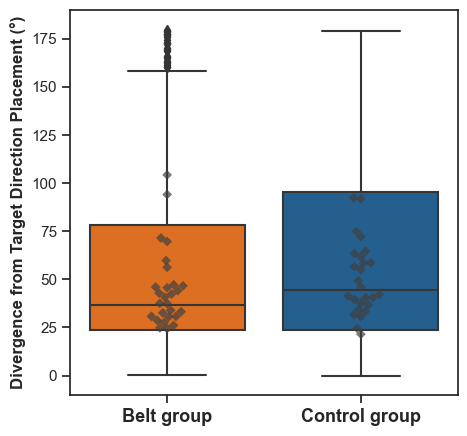

Distance:


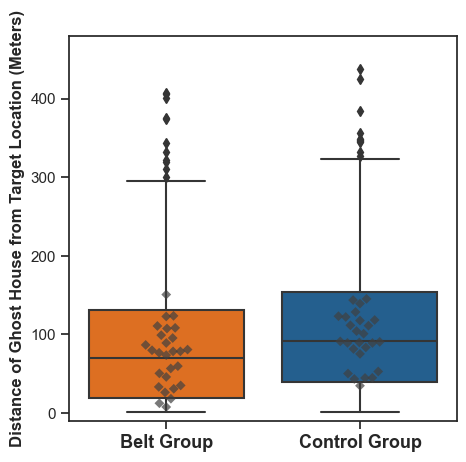

Rotation:


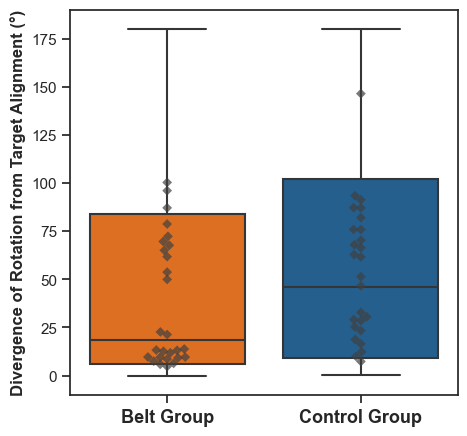

In [23]:
yvals, grp = [], []

for i, subject in enumerate(GHPbelt.SubjectID.unique()):
    yvals.append(np.median(
        GHPbelt[GHPbelt.SubjectID == subject]['RecalculatedAngle']))
    grp.append("Belt group")
    

for i, subject in enumerate(GHPcontrol.SubjectID.unique()):
    yvals.append(np.median(
        GHPcontrol[GHPcontrol.SubjectID == subject]['RecalculatedAngle']))
    grp.append("Control group")


# %%
#plt.title("Average Deviation from Target per Participants of the respective Groups")
sns.set(rc={"figure.figsize": (5, 5)}, style="ticks")
sns.boxplot(x=full_dataset.Condition, y=full_dataset.RecalculatedAngle, order=["Belt", "Control"], palette=['#fc6a03', '#1261a0'])
sns.swarmplot(x=grp, y=yvals, color="#404040", edgecolor="gray", facecolors='white',
              marker="D", alpha=0.7)

#plt.axhline(np.average(yvals), color='black', linestyle='--')
plt.ylabel("Divergence from Target Direction Placement (°)", weight = 'bold')
plt.xlabel("")
plt.xticks(size=13, weight='bold')
plt.ylim(-10,190)

print("Direction:")
#plt.savefig('Plots/GHP_Dir.png', bbox_inches="tight", dpi=800)
plt.show()


yvals, grp = [], []


for i, subject in enumerate(GHPbelt.SubjectID.unique()):
    yvals.append(np.median(
        GHPbelt[GHPbelt.SubjectID == subject]['GhostHouseDistanceToTargetHouse']))
    grp.append("Belt Group")
    
    
for i, subject in enumerate(GHPcontrol.SubjectID.unique()):
    yvals.append(np.median(
        GHPcontrol[GHPcontrol.SubjectID == subject]['GhostHouseDistanceToTargetHouse']))
    grp.append("Control Group")


#plt.title("Average Divergence per Participants of the respective Groups")
sns.set(rc={"figure.figsize": (5, 5)}, style="ticks")
sns.boxplot(x=full_dataset.Condition, y=full_dataset.GhostHouseDistanceToTargetHouse, 
            order=["Belt", "Control"], palette=['#fc6a03', '#1261a0'])
sns.swarmplot(x=grp, y=yvals, color="#404040", edgecolor="gray", facecolors='white',
              marker="D", alpha=0.7)
plt.ylabel("Distance of Ghost House from Target Location (Meters)", weight='bold')
plt.xlabel("")
plt.xticks(size=13, weight='bold')
plt.ylim(-10,480)

#plt.axhline(np.average(yvals), color='black', linestyle='--')

print("Distance:")
#plt.savefig('Plots/GHP_Dis.png', bbox_inches="tight", dpi=800)
plt.show()

yvals, grp = [], []


for i, subject in enumerate(GHPbelt.SubjectID.unique()):
    yvals.append(np.median(
        GHPbelt[GHPbelt.SubjectID == subject]['GHP_RotDiff']))
    grp.append("Belt Group")
    
    
for i, subject in enumerate(GHPcontrol.SubjectID.unique()):
    yvals.append(np.median(
        GHPcontrol[GHPcontrol.SubjectID == subject]['GHP_RotDiff']))
    grp.append("Control Group")


#plt.title("Average Divergence per Participants of the respective Groups")
sns.set(rc={"figure.figsize": (5, 5)}, style="ticks")
sns.boxplot(x=full_dataset.Condition, y=full_dataset.GHP_RotDiff, order=["Belt", "Control"], palette=['#fc6a03', '#1261a0'])
sns.swarmplot(x=grp, y=yvals, color="#404040", edgecolor="gray", facecolors='white',
              marker="D", alpha=0.7)

plt.ylabel("Divergence of Rotation from Target Alignment (°)", weight='bold')
plt.xlabel("")
plt.xticks(size=13, weight='bold')
plt.ylim(-10,190)

#plt.axhline(np.average(yvals), color='black', linestyle='--')

print("Rotation:")
#plt.savefig('Plots/GHP_Rot.png', bbox_inches="tight", dpi=800)
plt.show()

PTN:


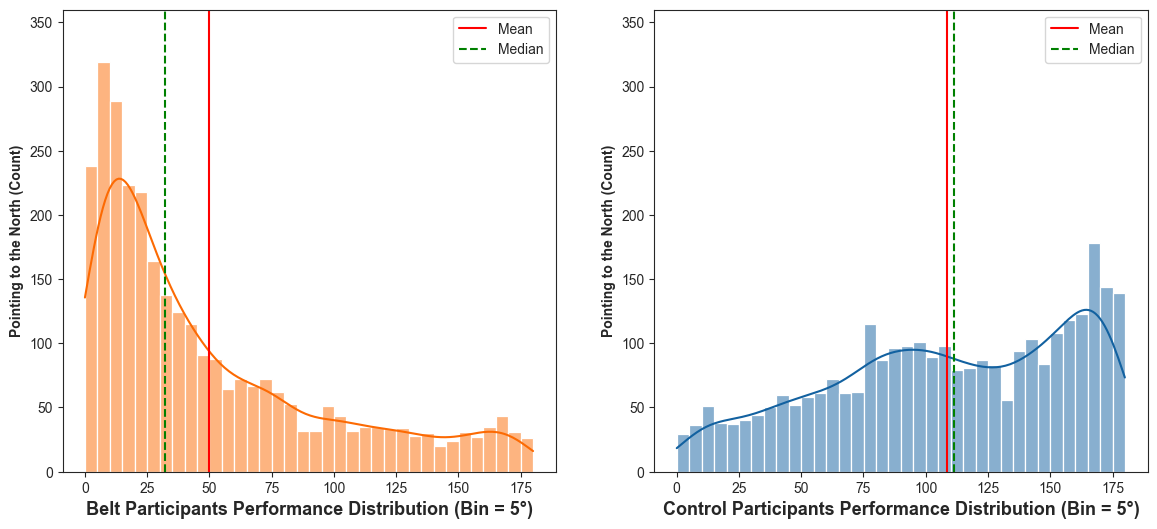

PTB:


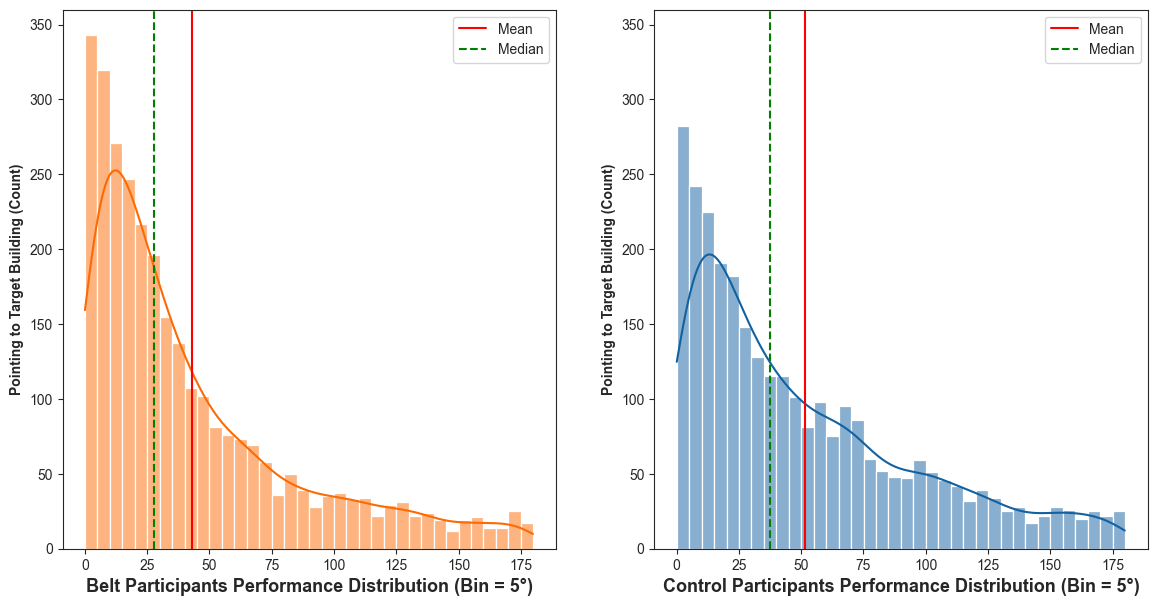

In [9]:
print("PTN:")
# Histogram über alle trials
#plt.title("Binned frequencies for deviation from the North (Control group)")
f, axs = plt.subplots(1, 2,
                      figsize=(14, 6),
                      # sharey=True,
                      gridspec_kw={'width_ratios': [1, 1]})

#plt.title("Binned frequencies for deviation from the North (Test Group)")
sns.histplot(data=PTNbelt, x="RecalculatedAngle", binwidth=5,
             color='#fc6a03', kde=True, ax=axs[0])

sns.histplot(data=PTNcontrol, x="RecalculatedAngle", binwidth=5,
             color= '#1261a0', kde=True, ax=axs[1])

axs[0].set(ylim=(0,360))
axs[0].axvline(x=PTNbelt["RecalculatedAngle"].mean(),
               color='red', label="Mean")
axs[0].axvline(x=np.median(PTNbelt["RecalculatedAngle"]),
               color='green', ls="--", label="Median")

axs[1].set(ylim=(0,360))
axs[1].axvline(x=PTNcontrol["RecalculatedAngle"].mean(),
               color='red', label="Mean")
axs[1].axvline(x=np.median(PTNcontrol["RecalculatedAngle"]),
               color='green', ls="--", label="Median")

axs[0].set_xlabel("Belt Participants Performance Distribution (Bin = 5°)", weight = 'bold', size=13)
axs[1].set_xlabel("Control Participants Performance Distribution (Bin = 5°)", weight = 'bold', size=13)
#axs[1].set_ylabel("Frequency", weight = 'bold')
axs[0].set_ylabel("Pointing to the North (Count)", weight = 'bold')
axs[1].set_ylabel("Pointing to the North (Count)", weight = 'bold')
axs[0].legend()
axs[1].legend()
#plt.savefig('Plots/PTN_hist.png', bbox_inches="tight", dpi=800)
plt.show()

print("PTB:")
# Histogram over all trials
#plt.title("Binned frequencies for divergence from Target (Control group)")
f, axs = plt.subplots(1,2,
                      figsize=(14,7),
                      #sharey=True, 
                      gridspec_kw={'width_ratios': [2, 2]})

#plt.title("Binned frequencies for divergence from Target (Test Group)")
sns.histplot(data=PTBbelt, x="RecalculatedAngle", binwidth=5, 
             color='#fc6a03', kde=True, ax=axs[0])

sns.histplot(data=PTBcontrol, x="RecalculatedAngle", binwidth=5, 
             color='#1261a0', kde=True, ax=axs[1])

axs[0].set(ylim=(0,360))
axs[1].set_xlabel("Control Participants Performance Distribution (Bin = 5°)", weight = 'bold', size=13)
axs[1].set_ylabel("Pointing to Target Building (Count)", weight = 'bold')

axs[1].axvline(x=PTBcontrol["RecalculatedAngle"].mean(),
               color='red', label="Mean")
axs[1].axvline(x=np.median(PTBcontrol["RecalculatedAngle"]),
               color='green', ls="--", label="Median")


axs[1].set(ylim=(0,360))
axs[0].set_xlabel("Belt Participants Performance Distribution (Bin = 5°)", weight = 'bold', size=13)
axs[0].set_ylabel("Pointing to Target Building (Count)", weight = 'bold')

axs[0].axvline(x=PTBbelt["RecalculatedAngle"].mean(),
               color='red', label="Mean")
axs[0].axvline(x=np.median(PTBbelt["RecalculatedAngle"]),
               color='green', ls="--", label="Median")
axs[0].legend()
axs[1].legend()
#plt.savefig('Plots/PTB_hist.png', bbox_inches="tight", dpi=800)
plt.show()

Direction:


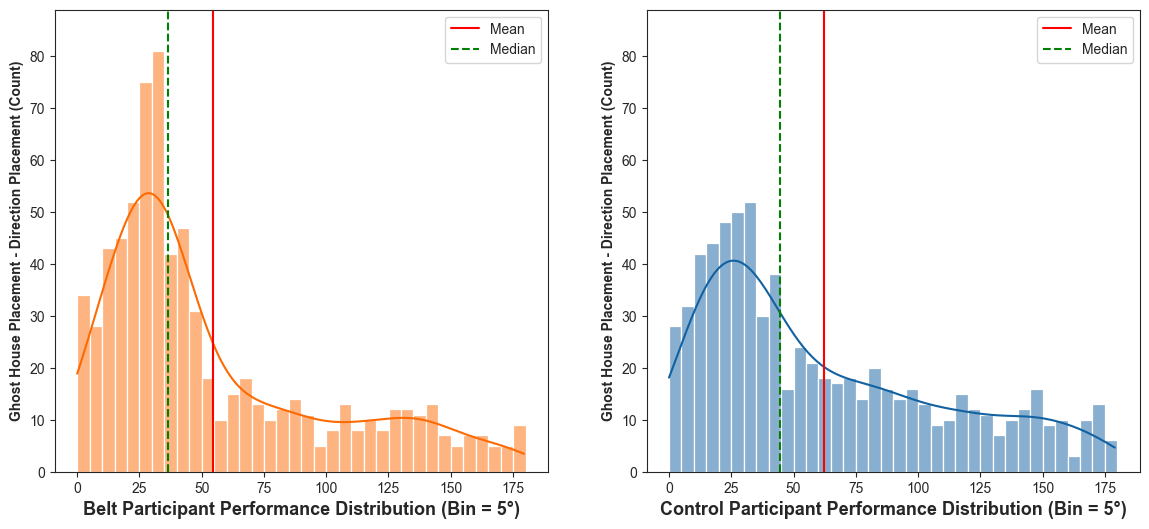

Distance:


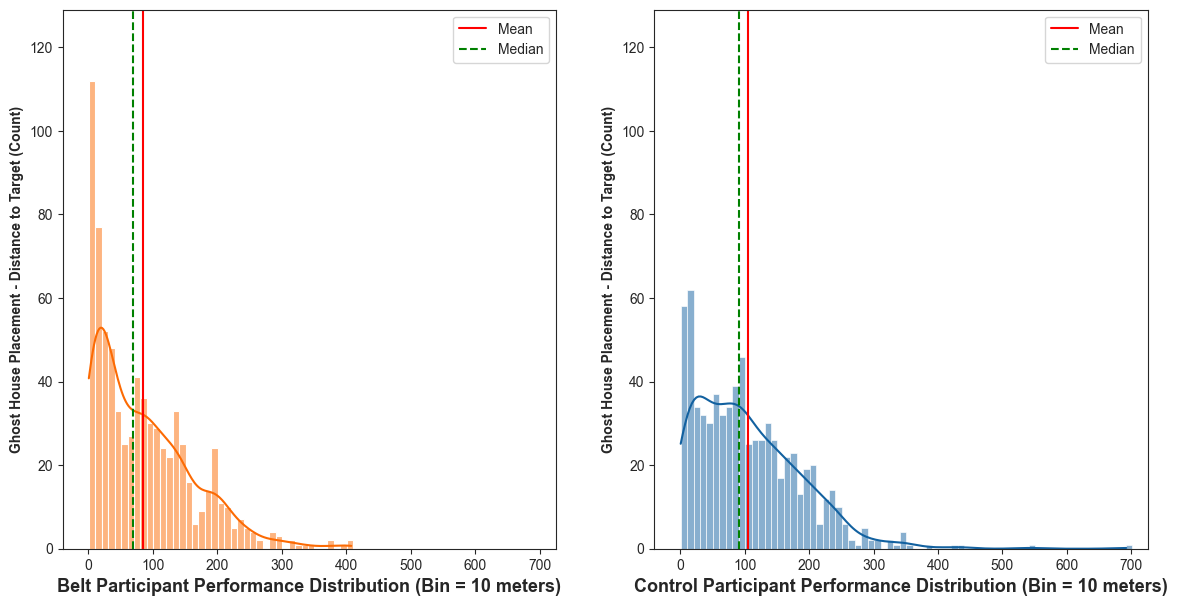

Rotation:


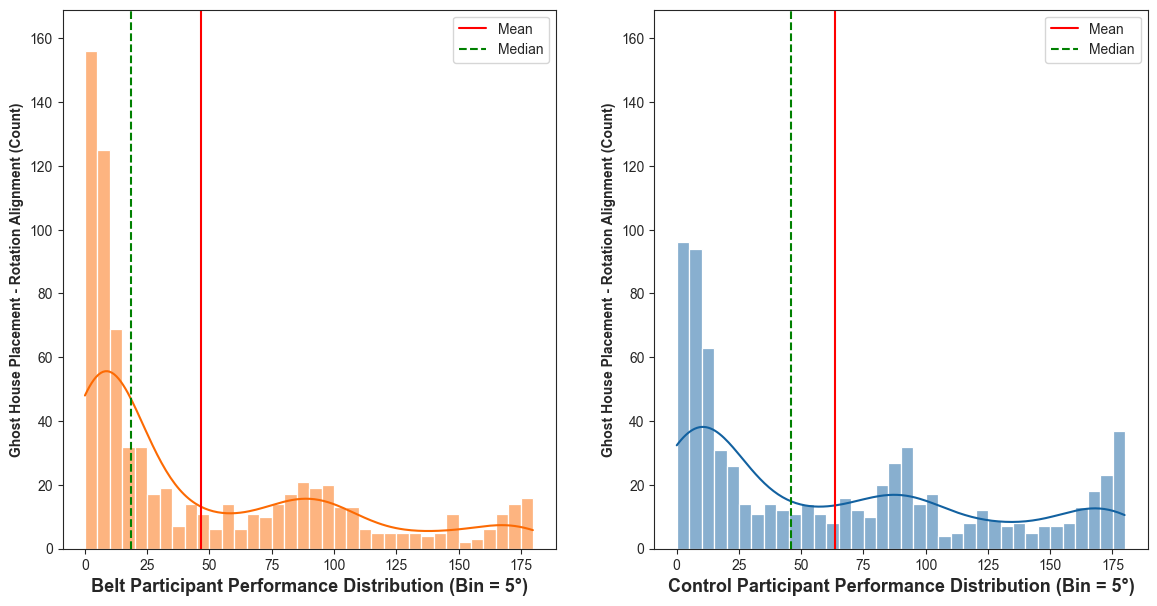

In [20]:
print("Direction:")
# Histogram über alle trials
#plt.title("Binned frequencies for deviation from the North (Control group)")
f, axs = plt.subplots(1, 2,
                      figsize=(14, 6),
                      # sharey=True,
                      gridspec_kw={'width_ratios': [1, 1]})

#plt.title("Binned frequencies for deviation from the North (Test Group)")
sns.histplot(data=GHPbelt, x="RecalculatedAngle", binwidth=5,
             color='#fc6a03', kde=True, ax=axs[0])

sns.histplot(data=GHPcontrol, x="RecalculatedAngle", binwidth=5,
             color='#1261a0', kde=True, ax=axs[1])

axs[0].set(ylim=(0,89))
axs[0].axvline(x=GHPbelt["RecalculatedAngle"].mean(),
               color='red', label="Mean")
axs[0].axvline(x=np.median(GHPbelt["RecalculatedAngle"]),
               color='green', ls="--", label="Median")

axs[1].set(ylim=(0,89))
axs[1].axvline(x=GHPcontrol["RecalculatedAngle"].mean(),
               color='red', label="Mean")
axs[1].axvline(x=np.median(GHPcontrol["RecalculatedAngle"]),
               color='green', ls="--", label="Median")

axs[0].set_xlabel("Belt Participant Performance Distribution (Bin = 5°)", weight = 'bold', size=13)
axs[1].set_xlabel("Control Participant Performance Distribution (Bin = 5°)", weight = 'bold', size=13)
#axs[1].set_ylabel("Frequency", weight = 'bold')
axs[0].set_ylabel("Ghost House Placement - Direction Placement (Count)", weight = 'bold')
axs[1].set_ylabel("Ghost House Placement - Direction Placement (Count)", weight = 'bold')
axs[0].legend()
axs[1].legend()
#plt.savefig('Plots/GHP_Dir_hist.png', bbox_inches="tight", dpi=800)
plt.show()

print("Distance:")
# Histogram over all trials
#plt.title("Binned frequencies for divergence from Target (Control group)")
f, axs = plt.subplots(1,2,
                      figsize=(14,7),
                      #sharey=True, 
                      gridspec_kw={'width_ratios': [2, 2]})

#plt.title("Binned frequencies for divergence from Target (Test Group)")
sns.histplot(data=GHPbelt, x="GhostHouseDistanceToTargetHouse", binwidth=10, 
             color='#fc6a03', kde=True, ax=axs[0])

sns.histplot(data=GHPcontrol, x="GhostHouseDistanceToTargetHouse", binwidth=10, 
             color='#1261a0', kde=True, ax=axs[1])

axs[0].set(xlim=(-40,725))
axs[0].set(ylim=(0,129))
axs[1].set_xlabel("Control Participant Performance Distribution (Bin = 10 meters)", weight = 'bold', size=13)
axs[1].set_ylabel("Ghost House Placement - Distance to Target (Count)", weight = 'bold')

axs[1].axvline(x=GHPcontrol["GhostHouseDistanceToTargetHouse"].mean(),
               color='red', label="Mean")
axs[1].axvline(x=np.median(GHPcontrol["GhostHouseDistanceToTargetHouse"]),
               color='green', ls="--", label="Median")


axs[1].set(xlim=(-40,725))
axs[1].set(ylim=(0,129))
axs[0].set_xlabel("Belt Participant Performance Distribution (Bin = 10 meters)", weight = 'bold', size=13)
axs[0].set_ylabel("Ghost House Placement - Distance to Target (Count)", weight = 'bold')

axs[0].axvline(x=GHPbelt["GhostHouseDistanceToTargetHouse"].mean(),
               color='red', label="Mean")
axs[0].axvline(x=np.median(GHPbelt["GhostHouseDistanceToTargetHouse"]),
               color='green', ls="--", label="Median")
axs[0].legend()
axs[1].legend()
#plt.savefig('Plots/GHP_Dis_hist.png', bbox_inches="tight", dpi=800)
plt.show()


print("Rotation:")
# Histogram over all trials
#plt.title("Binned frequencies for divergence from Target (Control group)")
f, axs = plt.subplots(1,2,
                      figsize=(14,7),
                      #sharey=True, 
                      gridspec_kw={'width_ratios': [2, 2]})

#plt.title("Binned frequencies for divergence from Target (Test Group)")
sns.histplot(data=GHPbelt, x="GHP_RotDiff", binwidth=5, color='#fc6a03', kde=True, ax=axs[0])

sns.histplot(data=GHPcontrol, x="GHP_RotDiff", binwidth=5, color='#1261a0', kde=True, ax=axs[1])

axs[0].set(ylim=(0,169))
axs[1].set_xlabel("Control Participant Performance Distribution (Bin = 5°)", weight = 'bold', size=13)
axs[1].set_ylabel("Ghost House Placement - Rotation Alignment (Count)", weight = 'bold')

axs[1].axvline(x=GHPcontrol["GHP_RotDiff"].mean(),
               color='red', label="Mean")
axs[1].axvline(x=np.median(GHPcontrol["GHP_RotDiff"]),
               color='green', ls="--", label="Median")


axs[1].set(ylim=(0,169))
axs[0].set_xlabel("Belt Participant Performance Distribution (Bin = 5°)", weight = 'bold', size=13)
axs[0].set_ylabel("Ghost House Placement - Rotation Alignment (Count)", weight = 'bold')

axs[0].axvline(x=GHPbelt["GHP_RotDiff"].mean(),
               color='red', label="Mean")
axs[0].axvline(x=np.median(GHPbelt["GHP_RotDiff"]),
               color='green', ls="--", label="Median")
axs[0].legend()
axs[1].legend()
#plt.savefig('Plots/GHP_Rot_hist.png', bbox_inches="tight", dpi=800)
plt.show()

PTN:


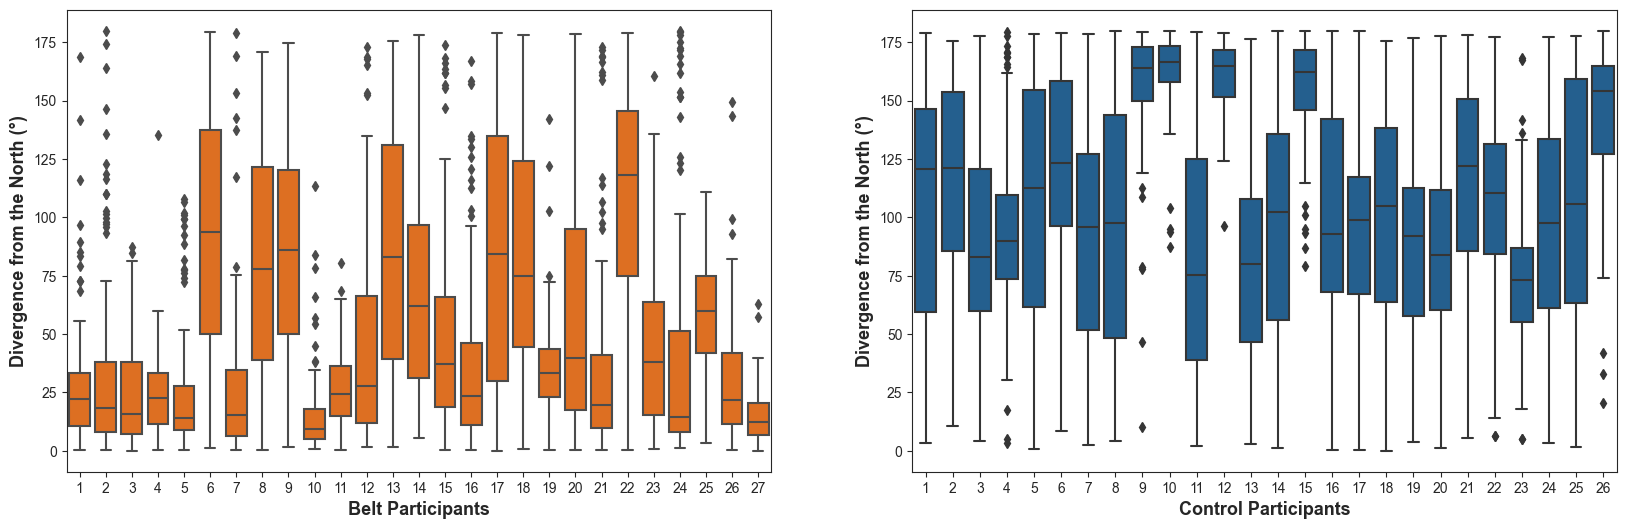

PTB:


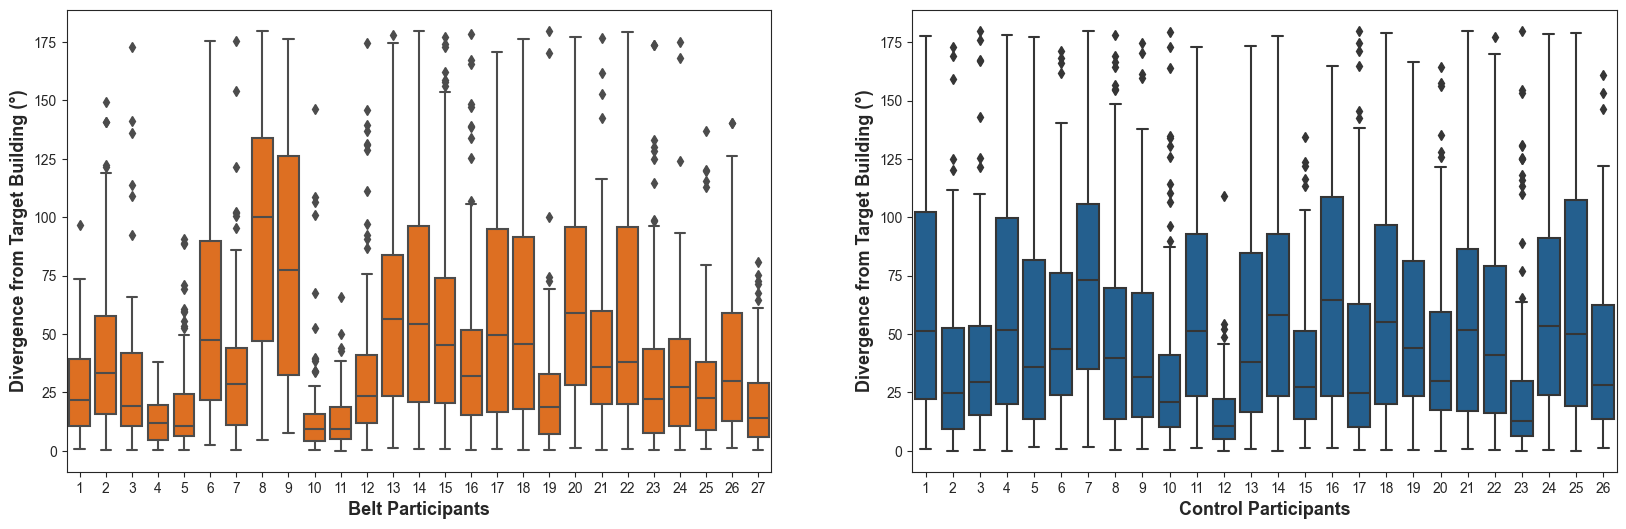

In [22]:
print("PTN:")
f, axs = plt.subplots(1,2,
                      figsize=(20,6),
                      #sharey=True, 
                      gridspec_kw={'width_ratios': [13, 13]})

#sns.set(rc={"figure.figsize": (6, 7)}, style="ticks")
sns.boxplot(data=PTNbelt, x='SubjectID',
            y='RecalculatedAngle', color='#fc6a03', ax=axs[0])
#plt.title("Boxplot of angle of deviation from North per belt group participant")
axs[0].set_xlabel("Belt Participants", weight = 'bold', size=13)
axs[0].set_ylabel("Divergence from the North (°)", weight = 'bold', size=13)
axs[0].set_xticklabels(['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27'])

#sns.set(rc={"figure.figsize": (12, 7)}, style="ticks")
sns.boxplot(data=PTNcontrol, x='SubjectID',
            y='RecalculatedAngle', color='#1261a0', ax=axs[1])
#plt.title("Boxplot of angle of deviation from North per control group participant")
axs[1].set_xlabel("Control Participants", weight = 'bold', size=13)
axs[1].set_ylabel("Divergence from the North (°)", weight = 'bold', size=13)
axs[1].set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26'])


#plt.savefig('Plots/PTN_individual.png', bbox_inches="tight", dpi=800)
plt.show()

print("PTB:")
# sns.set resets the style or theme preferences to the seaborn standard if not specifically mentioned
# just mention N size instead of normalizing plots
f, axs = plt.subplots(1, 2,
                      figsize=(20, 6),
                      # sharey=True,
                      gridspec_kw={'width_ratios': [13, 13]})

#sns.set(rc={"figure.figsize": (6, 7)}, style="ticks")
sns.boxplot(data=PTBbelt, x='SubjectID', y='RecalculatedAngle',
            color='#fc6a03', ax=axs[0])
axs[0].set_xlabel("Belt Participants", weight='bold', size=13)
axs[0].set_ylabel("Divergence from Target Building (°)", weight='bold', size=13)
axs[0].set_xticklabels(['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27'])


#sns.set(rc={"figure.figsize": (12, 7)}, style="ticks")
sns.boxplot(data=PTBcontrol, x='SubjectID', y='RecalculatedAngle',
            color='#1261a0', ax=axs[1])
axs[1].set_xlabel("Control Participants", weight='bold', size=13)
axs[1].set_ylabel("Divergence from Target Building (°)", weight='bold', size=13)
axs[1].set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26'])


#plt.savefig('Plots/PTB_individual.png', bbox_inches="tight", dpi=800)
plt.show()

Direction:


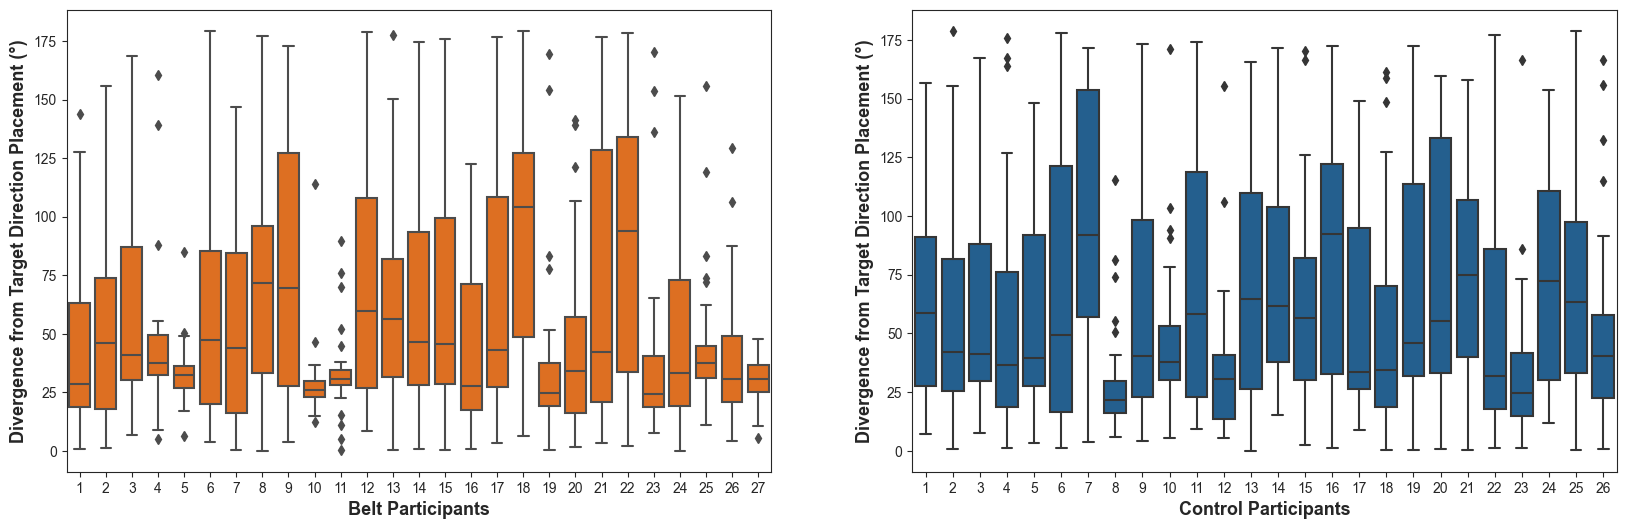

Distance:


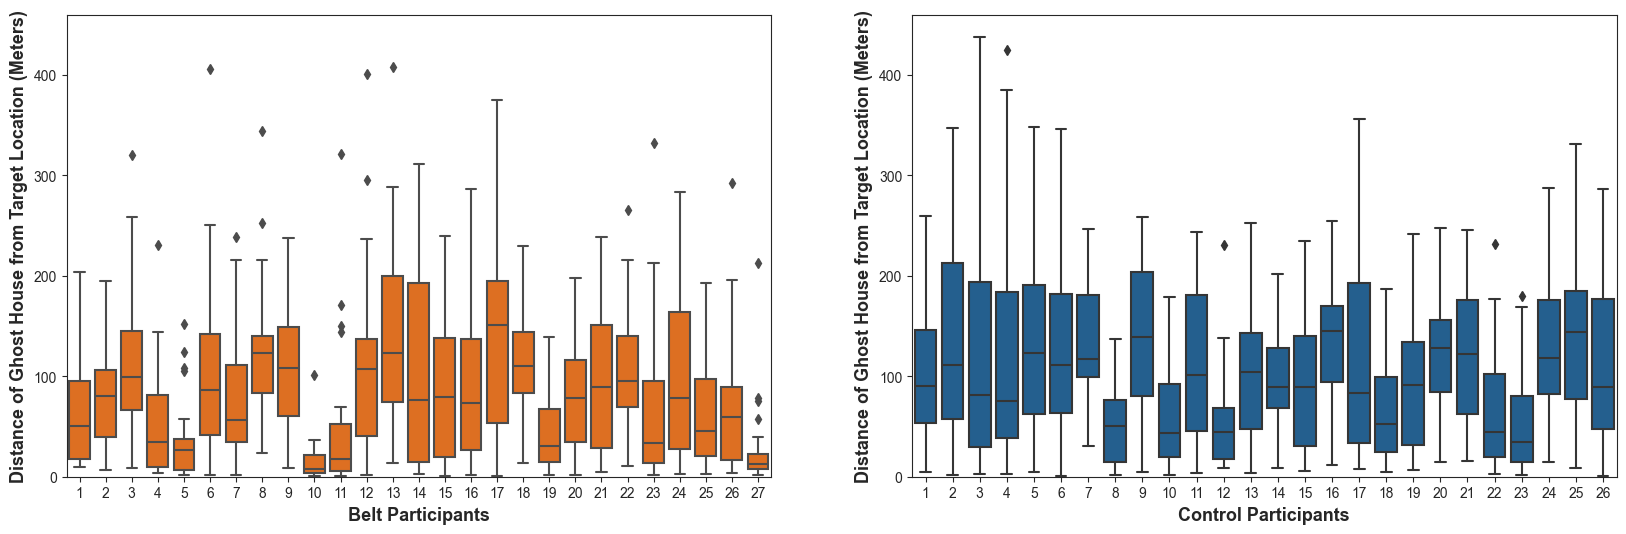

Rotation:


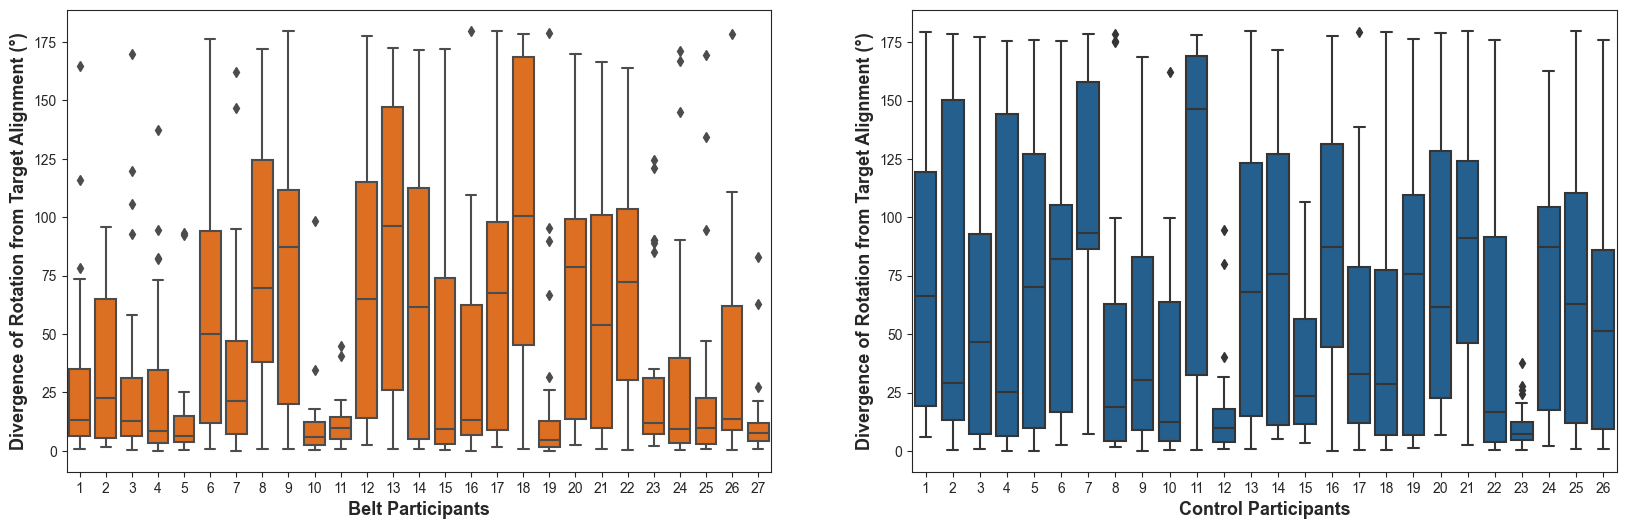

In [24]:
print("Direction:")
f, axs = plt.subplots(1,2,
                      figsize=(20,6),
                      #sharey=True, 
                      gridspec_kw={'width_ratios': [13, 13]})

#sns.set(rc={"figure.figsize": (6, 7)}, style="ticks")
sns.boxplot(data=GHPbelt, x='SubjectID',
            y='RecalculatedAngle', color='#fc6a03', ax=axs[0])
#plt.title("Boxplot of angle of deviation from North per belt group participant")
axs[0].set_xlabel("Belt Participants", weight = 'bold', size=13)
axs[0].set_ylabel("Divergence from Target Direction Placement (°)", weight = 'bold', size=13)
axs[0].set_xticklabels(['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27'])

#sns.set(rc={"figure.figsize": (12, 7)}, style="ticks")
sns.boxplot(data=GHPcontrol, x='SubjectID',
            y='RecalculatedAngle', color='#1261a0', ax=axs[1])
#plt.title("Boxplot of angle of deviation from North per control group participant")
axs[1].set_xlabel("Control Participants", weight = 'bold', size=13)
axs[1].set_ylabel("Divergence from Target Direction Placement (°)", weight = 'bold', size=13)
axs[1].set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26'])


#plt.savefig('Plots/GHP_Dir_individual.png', bbox_inches="tight", dpi=800)
plt.show()

print("Distance:")
# sns.set resets the style or theme preferences to the seaborn standard if not specifically mentioned
# just mention N size instead of normalizing plots
f, axs = plt.subplots(1, 2,
                      figsize=(20, 6),
                      # sharey=True,
                      gridspec_kw={'width_ratios': [13, 13]})

#sns.set(rc={"figure.figsize": (6, 7)}, style="ticks")
sns.boxplot(data=GHPbelt, x='SubjectID', y='GhostHouseDistanceToTargetHouse',
            color='#fc6a03', ax=axs[0])
axs[0].set_xlabel("Belt Participants", weight='bold', size=13)
axs[0].set_ylabel("Distance of Ghost House from Target Location (Meters)", weight='bold', size=13)
axs[0].set_xticklabels(['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27'])
axs[0].set(ylim=(0,460))

#sns.set(rc={"figure.figsize": (12, 7)}, style="ticks")
sns.boxplot(data=GHPcontrol, x='SubjectID', y='GhostHouseDistanceToTargetHouse',
            color='#1261a0', ax=axs[1])
axs[1].set_xlabel("Control Participants", weight='bold', size=13)
axs[1].set_ylabel("Distance of Ghost House from Target Location (Meters)", weight='bold', size=13)
axs[1].set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26'])
axs[1].set(ylim=(0,460))

#plt.savefig('Plots/GHP_Dis_individual.png', bbox_inches="tight", dpi=800)
plt.show()

print("Rotation:")
# sns.set resets the style or theme preferences to the seaborn standard if not specifically mentioned
# just mention N size instead of normalizing plots
f, axs = plt.subplots(1, 2,
                      figsize=(20, 6),
                      # sharey=True,
                      gridspec_kw={'width_ratios': [13, 13]})

#sns.set(rc={"figure.figsize": (6, 7)}, style="ticks")
sns.boxplot(data=GHPbelt, x='SubjectID', y='GHP_RotDiff',
            color='#fc6a03', ax=axs[0])
axs[0].set_xlabel("Belt Participants", weight='bold', size=13)
axs[0].set_ylabel("Divergence of Rotation from Target Alignment (°)", weight='bold', size=13)
axs[0].set_xticklabels(['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27'])


#sns.set(rc={"figure.figsize": (12, 7)}, style="ticks")
sns.boxplot(data=GHPcontrol, x='SubjectID', y='GHP_RotDiff',
            color='#1261a0', ax=axs[1])
axs[1].set_xlabel("Control Participants", weight='bold', size=13)
axs[1].set_ylabel("Divergence of Rotation from Target Alignment (°)", weight='bold', size=13)
axs[1].set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26'])


#plt.savefig('Plots/GHP_Rot_individual.png', bbox_inches="tight", dpi=800)
plt.show()

PTB


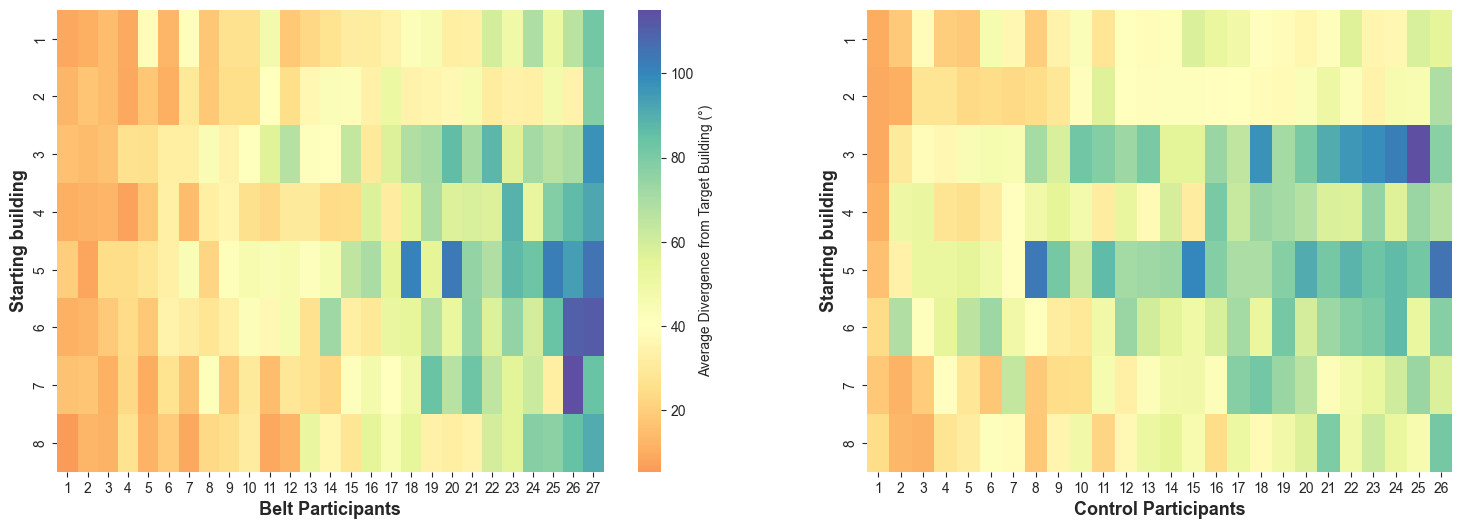

In [25]:
def meanErrXStartingB(participantgroup):
    heatmapdf = pd.DataFrame()
    # Draw mean deviation (angle) per participant (x) and starting building (y)
    for x in participantgroup.StartingPositionIndex.unique():
        targets = participantgroup[participantgroup.StartingPositionIndex == x]
        for y in targets.SubjectID.unique():
            
            targets[targets.SubjectID == y]
            heatmapdf = heatmapdf.append({'Building': x+1, 'SubjectID': str(y), 'MeanError': np.average(
                targets[targets.SubjectID == y]['RecalculatedAngle']), 'SubjectMean': np.average(participantgroup[participantgroup.SubjectID == y]['RecalculatedAngle'])}, ignore_index=True)

    return orderParticipants(heatmapdf, "SubjectMean")

# PTB

# plt.title("Average divergence from Target (in °) per control group Participant and starting building")
f, axs = plt.subplots(1, 2,
                      figsize=(18, 6),
                      # sharey=True,
                      gridspec_kw={'width_ratios': [14, 12]})
sns.heatmap(meanErrXStartingB(PTBcontrol).pivot("Building", "SubjectID",
            "MeanError"), cmap="Spectral", center=40, ax=axs[1], cbar=False)

sns.heatmap(meanErrXStartingB(PTBbelt).pivot("Building", "SubjectID",
            "MeanError"), cmap="Spectral", center=40, cbar_kws={'label': 'Average Divergence from Target Building (°)'}, ax=axs[0])

# plt.title(
#   "Average divergence from Target (in °) per test group Participant and starting building")
axs[0].set_xlabel("Belt Participants", weight='bold', size=13)
axs[0].set_ylabel("Starting building", weight='bold', size=13)
axs[0].set_yticklabels(['1', '2', '3', '4', '5', '6', '7', '8'])

axs[1].set_xlabel("Control Participants", weight='bold', size=13)
axs[1].set_ylabel("Starting building", weight='bold', size=13)
axs[1].set_yticklabels(['1', '2', '3', '4', '5', '6', '7', '8'])

print("PTB")
#plt.savefig('Plots/PTB_start.png', bbox_inches="tight", dpi=800)
plt.show()

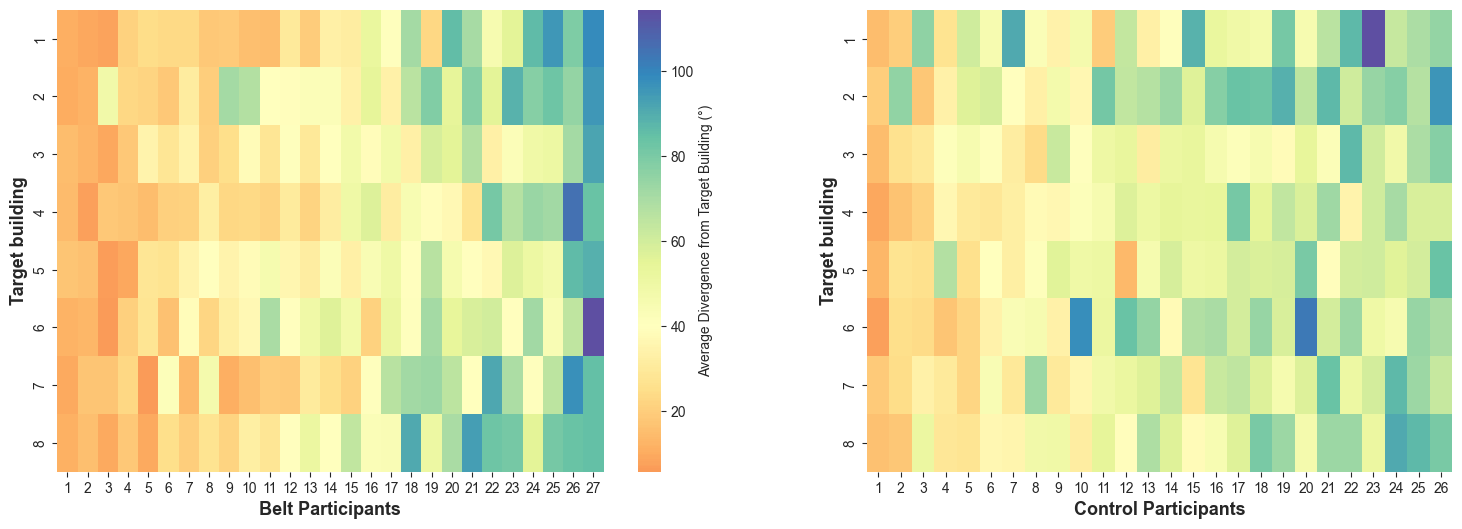

In [26]:
def meanErrXTargetB(participantgroup):
    heatmapdf = pd.DataFrame()
    # Draw mean deviation per participant (x) and target building (y)
    for x in participantgroup.TargetBuildingName.unique():
        targets = participantgroup[participantgroup.TargetBuildingName == x]
        for y in targets.SubjectID.unique():
            heatmapdf = heatmapdf.append({'Building': str(int(x[-1])), 'SubjectID': str(y), 'MeanError': np.average(
                targets[targets.SubjectID == y]['RecalculatedAngle']), 'SubjectMean': np.average(participantgroup[participantgroup.SubjectID == y]['RecalculatedAngle'])}, ignore_index=True)

    return orderParticipants(heatmapdf, "SubjectMean")


# Draw graphs for control and test group
# plt.title(
#    "Average divergence from Target (in °) per Control Group Participant and Target Building")
f, axs = plt.subplots(1, 2,
                      figsize=(18, 6),
                      # sharey=True,
                      gridspec_kw={'width_ratios': [14, 12]})
#   "Average divergence from Target (in °) per test group Participant and Target Building")
sns.heatmap(meanErrXTargetB(PTBbelt).pivot("Building",
            "SubjectID", "MeanError"), cmap="Spectral", cbar_kws={'label': 'Average Divergence from Target Building (°)'}, center=40, ax=axs[0])

sns.heatmap(meanErrXTargetB(PTBcontrol).pivot("Building",
            "SubjectID", "MeanError"), cmap="Spectral", center=40, ax=axs[1], cbar=False)
axs[0].set_xlabel("Belt Participants", weight='bold', size=13)
axs[0].set_ylabel("Target building", weight='bold', size=13)

# plt.title(

axs[1].set_xlabel("Control Participants", weight='bold', size=13)
axs[1].set_ylabel("Target building", weight='bold', size=13)

#plt.savefig('Plots/PTB_target.png', bbox_inches="tight", dpi=800)
plt.show()